## Final Project Submission

Please fill out:
* Student name: Benjamin Toler
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Microsoft Movie Analysis

# Overview


# Data Understanding
The data provided for this project is sourced from Box Office Mojo, IMBD, Rotten Tomatoes, The Movie DB, and The Numbers. I start by importing the data and previwing it to decide which datasets will be useful.

In [116]:
#import all necessary libraries
import pandas as pd

In [117]:
#import data with pandas
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_names = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_titles = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_titles_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', 
                  encoding= 'unicode_escape')
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
dfs = [bom_movies, imdb_names, imdb_titles, imdb_titles_basics,
       imdb_crew, imdb_principals, imdb_ratings, rt_movies, 
       rt_reviews, tmdb, tn_budgets]

In [118]:
#preview datasets
for index in range(len(dfs)):
    print("df",index+1)
    display(dfs[index].head(2))

df 1


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


df 2


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


df 3


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


df 4


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


df 5


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


df 6


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


df 7


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


df 8


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


df 9


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


df 10


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


df 11


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


After previeing this data, I have decided to move forward using imdbitles, imdbitles_basics, imdbatings, and tn_budgets datasets.

## IMDB_titles

In [119]:
imdb_titles.head(5)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [120]:
imdb_titles.title_id.value_counts()

tt2488496    61
tt1201607    55
tt2310332    55
tt2948356    53
tt1790809    53
             ..
tt2316383     1
tt4218728     1
tt3994448     1
tt2167708     1
tt5690820     1
Name: title_id, Length: 122302, dtype: int64

## IMDB_titles_basics

In [121]:
imdb_titles_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [122]:
imdb_titles_basics.tconst.value_counts()

tt4454834    1
tt3727922    1
tt5878448    1
tt2007418    1
tt6878626    1
            ..
tt0810815    1
tt4983736    1
tt1575530    1
tt1764698    1
tt4688142    1
Name: tconst, Length: 146144, dtype: int64

## IMDB_ratings

In [123]:
imdb_ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [124]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## TN_budgets

In [125]:
tn_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [126]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Preparation

## Data Cleaning

For each dataset I drop unecessary columns and rows, and I manipulate the data to usable forms

In [127]:
#select only US films
imdb_titles = imdb_titles[imdb_titles.region == 'US']

#drop duplicate rows
imdb_titles.drop_duplicates('title_id', inplace=True)

#drop unecessary columns
imdb_titles.drop(['ordering', 'title', 'language', 'types', 'attributes', 
                  'is_original_title'], axis=1, inplace=True)


<ipython-input-127-890cd2c96c3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_titles.drop_duplicates('title_id', inplace=True)
C:\Users\bento\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [128]:
imdb_titles.shape

(47433, 2)

In [129]:
# #drop unecessary columns
imdb_titles_basics.drop('original_title', axis=1, inplace=True)

#rename columns
imdb_titles_basics.rename(columns={'primary_title': 'movie'}, 
                          inplace=True)

#drop row where genre is NaN
imdb_titles_basics.dropna(subset=['genres'], inplace=True)

#convert string of genres into list of strings
imdb_titles_basics['genres'] = imdb_titles_basics.genres.map(lambda x: x.split(","))

In [130]:
imdb_titles_basics.genres

0            [Action, Crime, Drama]
1                [Biography, Drama]
2                           [Drama]
3                   [Comedy, Drama]
4          [Comedy, Drama, Fantasy]
                    ...            
146138    [Adventure, History, War]
146139                      [Drama]
146140                [Documentary]
146141                     [Comedy]
146143                [Documentary]
Name: genres, Length: 140736, dtype: object

In [131]:
#drop unecessary columns
imdb_ratings.drop('numvotes', axis=1, inplace=True)

In [132]:
imdb_ratings.shape

(73856, 2)

In [133]:
#convert budget and gross columsn into numerics
tn_budgets['domestic_gross'] = tn_budgets.domestic_gross.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))
tn_budgets['production_budget'] = tn_budgets.production_budget.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))
tn_budgets['worldwide_gross'] = tn_budgets.worldwide_gross.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))

#seperate release date into year and month
tn_budgets['start_year'] = tn_budgets.release_date.map(lambda x: int(x[-4:]))
tn_budgets['start_month'] = tn_budgets.release_date.map(lambda x: x[:3])

#drop unecessary columns
tn_budgets.drop(['id', 'release_date'], axis=1, inplace=True)

In [134]:
tn_budgets.shape

(5782, 6)

## Merge Data
I start by merging imdb dataset through their common identifiers title_id/tconst

In [135]:
#reset the imdb_title_baiscs and imdb_ratings index to tconst
imdb_titles_basics.set_index('tconst', inplace=True)
imdb_ratings.set_index('tconst', inplace=True)

In [136]:
imdb_titles_and_basics = imdb_titles.join(imdb_titles_basics, how='inner', 
                                          on='title_id')

In [137]:
imdb_titles_and_basics.shape

(46840, 6)

In [138]:
imdb_combined = imdb_titles_and_basics.join(imdb_ratings, how='left',
                                           on='title_id')

In [139]:
imdb_combined

,title_id,region,movie,start_year,runtime_minutes,genres,averagerating
12,tt0369610,US,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0
50,tt0401729,US,John Carter,2012,132.0,"[Action, Adventure, Sci-Fi]",6.6
109,tt1014759,US,Alice in Wonderland,2010,108.0,"[Adventure, Family, Fantasy]",6.5
152,tt10379338,US,Random Night Out,2019,NaN,[Comedy],NaN
157,tt10446418,US,Icon,2011,215.0,"[Documentary, History]",NaN
...,...,...,...,...,...,...,...
331641,tt9310460,US,Coconut the Little Dragon 2 Into the Jungle,2018,NaN,"[Adventure, Animation, Comedy]",5.9
331654,tt9358044,US,Hail Satan?,2019,95.0,[Documentary],6.8
331673,tt9562694,US,Alien Warfare,2019,88.0,"[Action, Sci-Fi]",2.6
331686,tt9705860,US,Dusan Vukotic Croatian Oscar Winner,2011,55.0,[Documentary],NaN


In [140]:
tn_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross,start_year,start_month
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,Dec
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,May
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,Jun
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,May
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Dec


Now I merge the combined imdb dataset with the tn_budgets. Since these dataset dont have a common identifier, I will merge them using the movie title and release year.

In [141]:
movie_df = imdb_combined.merge(tn_budgets, how='inner', 
                               left_on= ['movie', 'start_year'],
                              right_on= ['movie', 'start_year'])

In [142]:
movie_df.movie.value_counts()

Redemption                        3
Treachery                         2
The Family                        2
Cyrus                             2
Abduction                         2
                                 ..
The Words                         1
Poltergeist                       1
The Switch                        1
Rise of the Planet of the Apes    1
Oblivion                          1
Name: movie, Length: 1323, dtype: int64

Some of the movie in our datsets have the same movie title and year depstie being differnet movies. Because we are joing the tn_budgets dataset with the imbd through movie title and year, any movie/year that has multiple occurences will be given the same value from the tn_budgets dataset. Since there is now way of telling which occurence matches the tn_budgets occurence, we will eliminate any movie/year combos that have duplicates.

In [143]:
movie_df.drop_duplicates(subset='movie', keep=False, inplace=True)

In [144]:
movie_df.shape

(1307, 11)

## Featrure Engineering
I am interested in how profitable each movie is, thus in addition to gross profit, I want a column for the net profit as well as teh ROI(return on investment).

In [145]:
#add column for worldwide net profit
movie_df['worldwide_net'] = (movie_df.worldwide_gross 
                             - movie_df.production_budget)

#add column for return on investment in perecentage
movie_df['ROI'] = (movie_df.worldwide_net 
                   / movie_df.production_budget) *100

In [146]:
movie_df['Rating Category'] = movie_df.averagerating.map(
    lambda x: "Bad" if x <=4 else ("Average" if x <= 7 else "Good"))

# Analysis

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Genre
What genres generate the greatest box office returns?

In [191]:
genres_movie_df = movie_df.explode('genres')

In [192]:
genres_grouped = genres_movie_df.groupby('genres').mean().sort_values(
    by='worldwide_net', ascending=False)

In [193]:
genres_grouped[['worldwide_gross', 'worldwide_net']].head()

,worldwide_gross,worldwide_net
genres,,
Animation,3.895949e+08,2.889107e+08
Sci-Fi,3.651688e+08,2.655196e+08
Adventure,3.695761e+08,2.577763e+08
Musical,2.996640e+08,2.368974e+08
Action,2.589358e+08,1.745927e+08


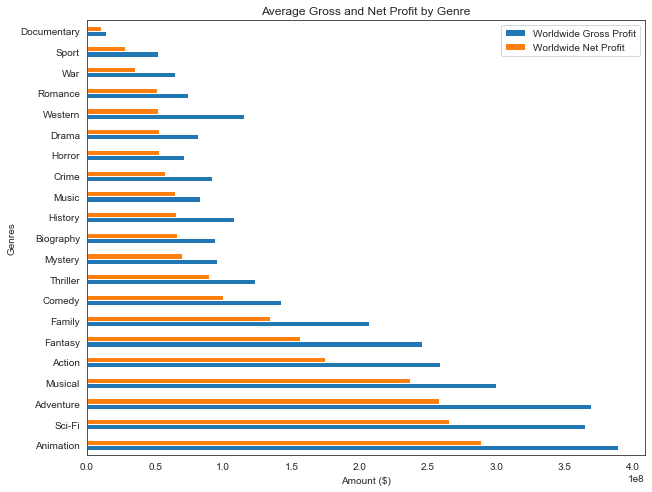

In [194]:
ax = genres_grouped.plot(kind='barh', y=['worldwide_gross','worldwide_net'], 
                        figsize=(10,8));
ax.set_title('Average Gross and Net Profit by Genre');
ax.legend(['Worldwide Gross Profit', 'Worldwide Net Profit'], loc=1);
ax.set_ylabel('Genres');
ax.set_xlabel('Amount ($)');

In [195]:
genres_grouped.sort_values(by='ROI', ascending=False, inplace=True)

In [196]:
genres_grouped['ROI'].head()

genres
Mystery      920.382772
Horror       884.937268
Thriller     575.185898
Romance      284.238835
Biography    277.023948
Name: ROI, dtype: float64

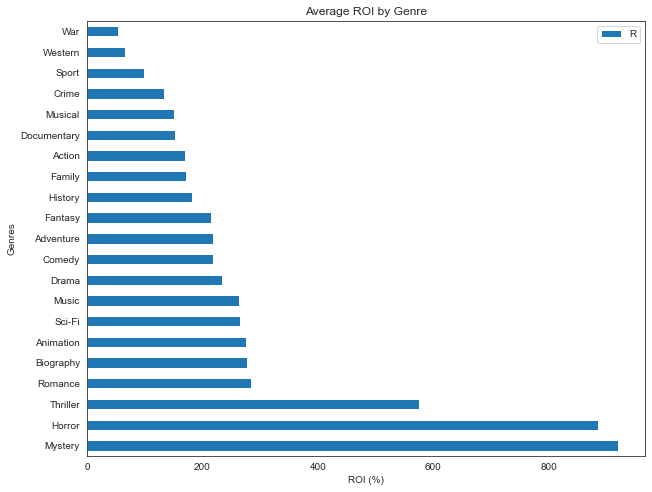

In [197]:
ax = genres_grouped.plot(kind='barh', y='ROI', 
                        figsize=(10,8));
ax.set_title('Average ROI by Genre');
ax.legend('ROI', loc=1);
ax.set_ylabel('Genres');
ax.set_xlabel('ROI (%)');

## Release Month
What time of the year is it most profitable to release a movie?

In [155]:
month_grouped = movie_df.groupby('start_month').mean()

In [156]:
month_grouped

,start_year,runtime_minutes,averagerating,production_budget,domestic_gross,worldwide_gross,worldwide_net,ROI
start_month,,,,,,,,
Apr,2013.721519,106.467532,6.255128,4.537595e+07,6.811657e+07,1.797463e+08,1.343703e+08,242.036692
Aug,2013.654545,104.181818,6.150909,3.714427e+07,4.699628e+07,1.012135e+08,6.406923e+07,229.164249
Dec,2013.790123,110.607595,6.261392,4.108827e+07,5.432190e+07,1.334885e+08,9.240027e+07,158.657012
Feb,2014.372093,106.705882,5.964286,4.483884e+07,6.495192e+07,1.428544e+08,9.801556e+07,277.364392
Jan,2014.016949,104.440678,5.724138,3.184453e+07,3.722809e+07,7.151677e+07,3.967224e+07,443.587057
Jul,2013.820755,105.723810,6.300952,6.119108e+07,8.054830e+07,2.141248e+08,1.529337e+08,740.133043
Jun,2014.194444,108.327103,6.435849,7.154993e+07,9.919551e+07,2.533493e+08,1.817994e+08,290.438499
Mar,2014.307018,106.508772,6.199123,5.636439e+07,6.655330e+07,1.583828e+08,1.020184e+08,184.395693
May,2014.247312,109.430108,6.233333,8.118226e+07,9.620422e+07,2.586264e+08,1.774442e+08,232.333144


In [157]:
month_grouped.reset_index(inplace=True)

In [158]:
order = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
month_grouped.index = order
month_grouped.sort_index(inplace=True)

In [159]:
month_grouped.set_index('start_month', inplace=True)

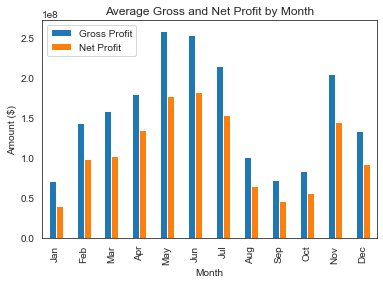

In [200]:
ax = month_grouped.plot(kind='bar', y=['worldwide_gross','worldwide_net']);
ax.set_title('Average Gross and Net Profit by Month');
ax.legend(['Gross Profit', 'Net Profit'], loc=2);
ax.set_xlabel('Month');
ax.set_ylabel('Amount ($)');

## Correlations with Net Profit and ROI
What numeric factor correlates the highest with net profit and ROI

In [187]:

#overall production budget correlations
budget_net_corr = movie_df.production_budget.corr(movie_df.worldwide_net)
print("Overall Budget Correlation with Net Profit: ", budget_net_corr)

budget_roi_corr = movie_df.production_budget.corr(movie_df.ROI)
print("Overall Budget Correlation with ROI: ", budget_roi_corr)


#bad rating
budget_net_corr = movie_df.production_budget.corr(movie_df[movie_df['Rating Category'] == "Bad"].worldwide_net)
print("Bad Rating Budget Correlation with Net Profit: ", budget_net_corr)

budget_roi_corr = movie_df.production_budget.corr(movie_df[movie_df['Rating Category'] == "Bad"].ROI)
print("Bad Rating Budget Correlation with ROI: ", budget_roi_corr)

#average rating
budget_net_corr = movie_df.production_budget.corr(movie_df[movie_df['Rating Category'] == "Average"].worldwide_net)
print("Average Rating Budget Correlation with Net Profit: ", budget_net_corr)

budget_roi_corr = movie_df.production_budget.corr(movie_df[movie_df['Rating Category'] == "Average"].ROI)
print("Average Rating Budget Correlation with ROI: ", budget_roi_corr)

#good rating
budget_net_corr = movie_df.production_budget.corr(movie_df[movie_df['Rating Category'] == "Good"].worldwide_net)
print("Good Rating Budget Correlation with Net Profit: ", budget_net_corr)

budget_roi_corr = movie_df.production_budget.corr(movie_df[movie_df['Rating Category'] == "Good"].ROI)
print("Good Rating Budget Correlation with ROI: ", budget_roi_corr)

Overall Budget Correlation with Net Profit:  0.6545158806164486
Overall Budget Correlation with ROI:  -0.04410666658309808
Bad Rating Budget Correlation with Net Profit:  0.2482491525599471
Bad Rating Budget Correlation with ROI:  0.22886416311839403
Average Rating Budget Correlation with Net Profit:  0.5615786423045609
Average Rating Budget Correlation with ROI:  -0.054949151383564564
Good Rating Budget Correlation with Net Profit:  0.7733048246515871
Good Rating Budget Correlation with ROI:  -0.10746651500486912


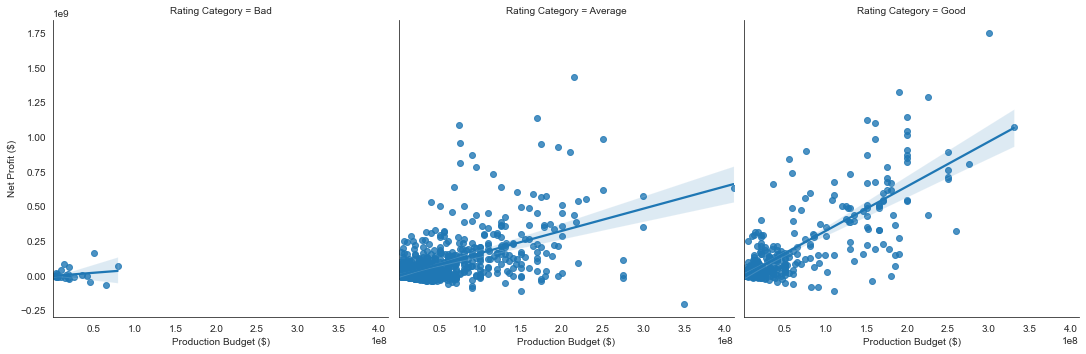

In [202]:
chart = sns.lmplot(x='production_budget', y='worldwide_net',
                        col='Rating Category', data=movie_df, 
                   col_order=["Bad", "Average", "Good"])
chart.set_axis_labels('Production Budget ($)', 'Net Profit ($)');

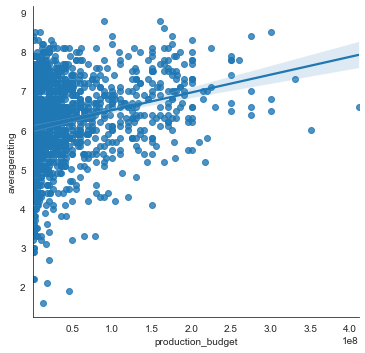

In [213]:
chart = sns.lmplot(x='production_budget', y='averagerating', data=movie_df)